In [1]:
import torch
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
import numpy as np
import torch.nn as nn 
import torch.nn.functional as F

class model(nn.Module):
    """ ReLU k shallow neural network
    Parameters: 
    input size: input dimension
    hidden_size1 : number of hidden layers 
    num_classes: output classes 
    k: degree of relu functions
    """
    def __init__(self, input_size, hidden_size1, num_classes,k = 1):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, num_classes,bias = False)
        self.k = k 
    def forward(self, x):
        u1 = self.fc2(F.relu(self.fc1(x))**self.k)
        return u1

def print_convergence_order(err, neuron_num_exponent): 

    neuron_nums = [2**j for j in range(2,neuron_num_exponent)]
    err_list = [err[i] for i in neuron_nums ] 

    print("neuron num \t\t error \t\t order")
    for i, item in enumerate(err_list):
        if i == 0: 
            print(neuron_nums[i], end = "\t\t")
            print(item, end = "\t\t")
            print("*")
        else: 
            print(neuron_nums[i], end = "\t\t")
            print(item, end = "\t\t") 
            print(np.log(err_list[i-1]/err_list[i])/np.log(2))


In [2]:
folder = 'data/'
# experiment_label = 'ex1'
err_list_relu_4_rand = []
function_name = "sinpipipi" 

# for N0 in [2*1,2**2,2**3,2**4,2**5]: 
#     save = True  
#     f_write = open(filename_write, "a")
#     my_model = None 
#     s = 2**5  
#     Nx = 25   
#     order = 3    
#     exponent = 9  
#     num_epochs = 2**exponent  
#     plot_freq = 1 
#     err_QMC2, my_model = OGAL2FittingReLU3D_QMC(my_model,target,s,N0,num_epochs,plot_freq, Nx, order, k =1, linear_solver = "ls")
    
#     if save: 
#         folder = 'data/'
#         filename = folder + 'err_OGA_3D_{}_neuron_{}_N_{}_randomized.pt'.format(function_name,num_epochs,s*N0)
#         torch.save(err_QMC2,filename) 
#         folder = 'data/'
#         filename = folder + 'model_OGA_3D_{}_neuron_{}_N_{}_randomized.pt'.format(function_name,num_epochs,s*N0)
#         torch.save(my_model,filename)
        
for k in [1]: 
    for N0 in [2*1,2**2,2**3,2**4,2**5]: 
        s = 2**5 
        exponent = 9  
        num_epochs=  2**exponent 
        print("relu {}, dict size {}".format(k,s * N0))
        
        filename = folder + 'err_OGA_3D_{}_neuron_{}_N_{}_randomized.pt'.format(function_name,num_epochs,s*N0)
        
        err = torch.load(filename)  
        err_list_relu_4_rand.append(err) 
        print_convergence_order(err,exponent+1) 

print("deterministic dictionary")
# print() 


err_list_relu_4_deterministic = []

# for N_list in [[2**4,2**4,2**4],[2**4,2**4,2**3],[2**4,2**3,2**3]]: 
#     save = True 
#     f_write = open(filename_write, "a")
#     my_model = None 
#     Nx = 25   
#     order = 2    
#     exponent = 9  
#     num_epochs = 2**exponent  
#     plot_freq = 1 
#     N = np.prod(N_list)
#     err_QMC2, my_model = OGAL2FittingReLU3D(my_model,target,N_list,num_epochs,plot_freq, Nx, order, k =1, linear_solver = "ls")
    
#     if save: 
#         folder = 'data/'
#         filename = folder + 'err_OGA_3D_{}_neuron_{}_N_{}_deterministic.pt'.format(function_name,num_epochs,N)
#         torch.save(err_QMC2,filename) 
#         folder = 'data/'
#         filename = folder + 'model_OGA_3D_{}_neuron_{}_N_{}_deterministic.pt'.format(function_name,num_epochs,N)
#         torch.save(my_model,filename)

        
for k in [1]: 
    for N_list in [[2**4,2**3,2**3],[2**4,2**4,2**3],[2**4,2**4,2**4]]: 
        N = np.prod(N_list)
        exponent = 9  
        num_epochs=  2**exponent 
        print("relu {}, dict size {}".format(k,N))

        filename = folder + 'err_OGA_3D_{}_neuron_{}_N_{}_deterministic.pt'.format(function_name,num_epochs,N)
        err = torch.load(filename)   
        err_list_relu_4_deterministic.append(err) 
        print_convergence_order(err,exponent+1) 

        

relu 1, dict size 64
neuron num 		 error 		 order
4		tensor(0.2030, dtype=torch.float64)		*
8		tensor(0.1543, dtype=torch.float64)		tensor(0.3954, dtype=torch.float64)
16		tensor(0.0819, dtype=torch.float64)		tensor(0.9147, dtype=torch.float64)
32		tensor(0.0481, dtype=torch.float64)		tensor(0.7681, dtype=torch.float64)
64		tensor(0.0246, dtype=torch.float64)		tensor(0.9694, dtype=torch.float64)
128		tensor(0.0118, dtype=torch.float64)		tensor(1.0573, dtype=torch.float64)
256		tensor(0.0055, dtype=torch.float64)		tensor(1.1014, dtype=torch.float64)
512		tensor(0.0025, dtype=torch.float64)		tensor(1.1404, dtype=torch.float64)
relu 1, dict size 128
neuron num 		 error 		 order
4		tensor(0.2203, dtype=torch.float64)		*
8		tensor(0.1064, dtype=torch.float64)		tensor(1.0505, dtype=torch.float64)
16		tensor(0.0767, dtype=torch.float64)		tensor(0.4725, dtype=torch.float64)
32		tensor(0.0457, dtype=torch.float64)		tensor(0.7465, dtype=torch.float64)
64		tensor(0.0242, dtype=torch.float64)		ten

/var/folders/45/p1_q2drx75983lk7ph_1gx6mhpr5_w/T/ipykernel_68761/1530084077.py:19: RuntimeWarning: invalid value encountered in reciprocal
  ref = err_list_relu_4_rand[0][2**2]* (x/ 4)**(rate)*rescale_ref


0

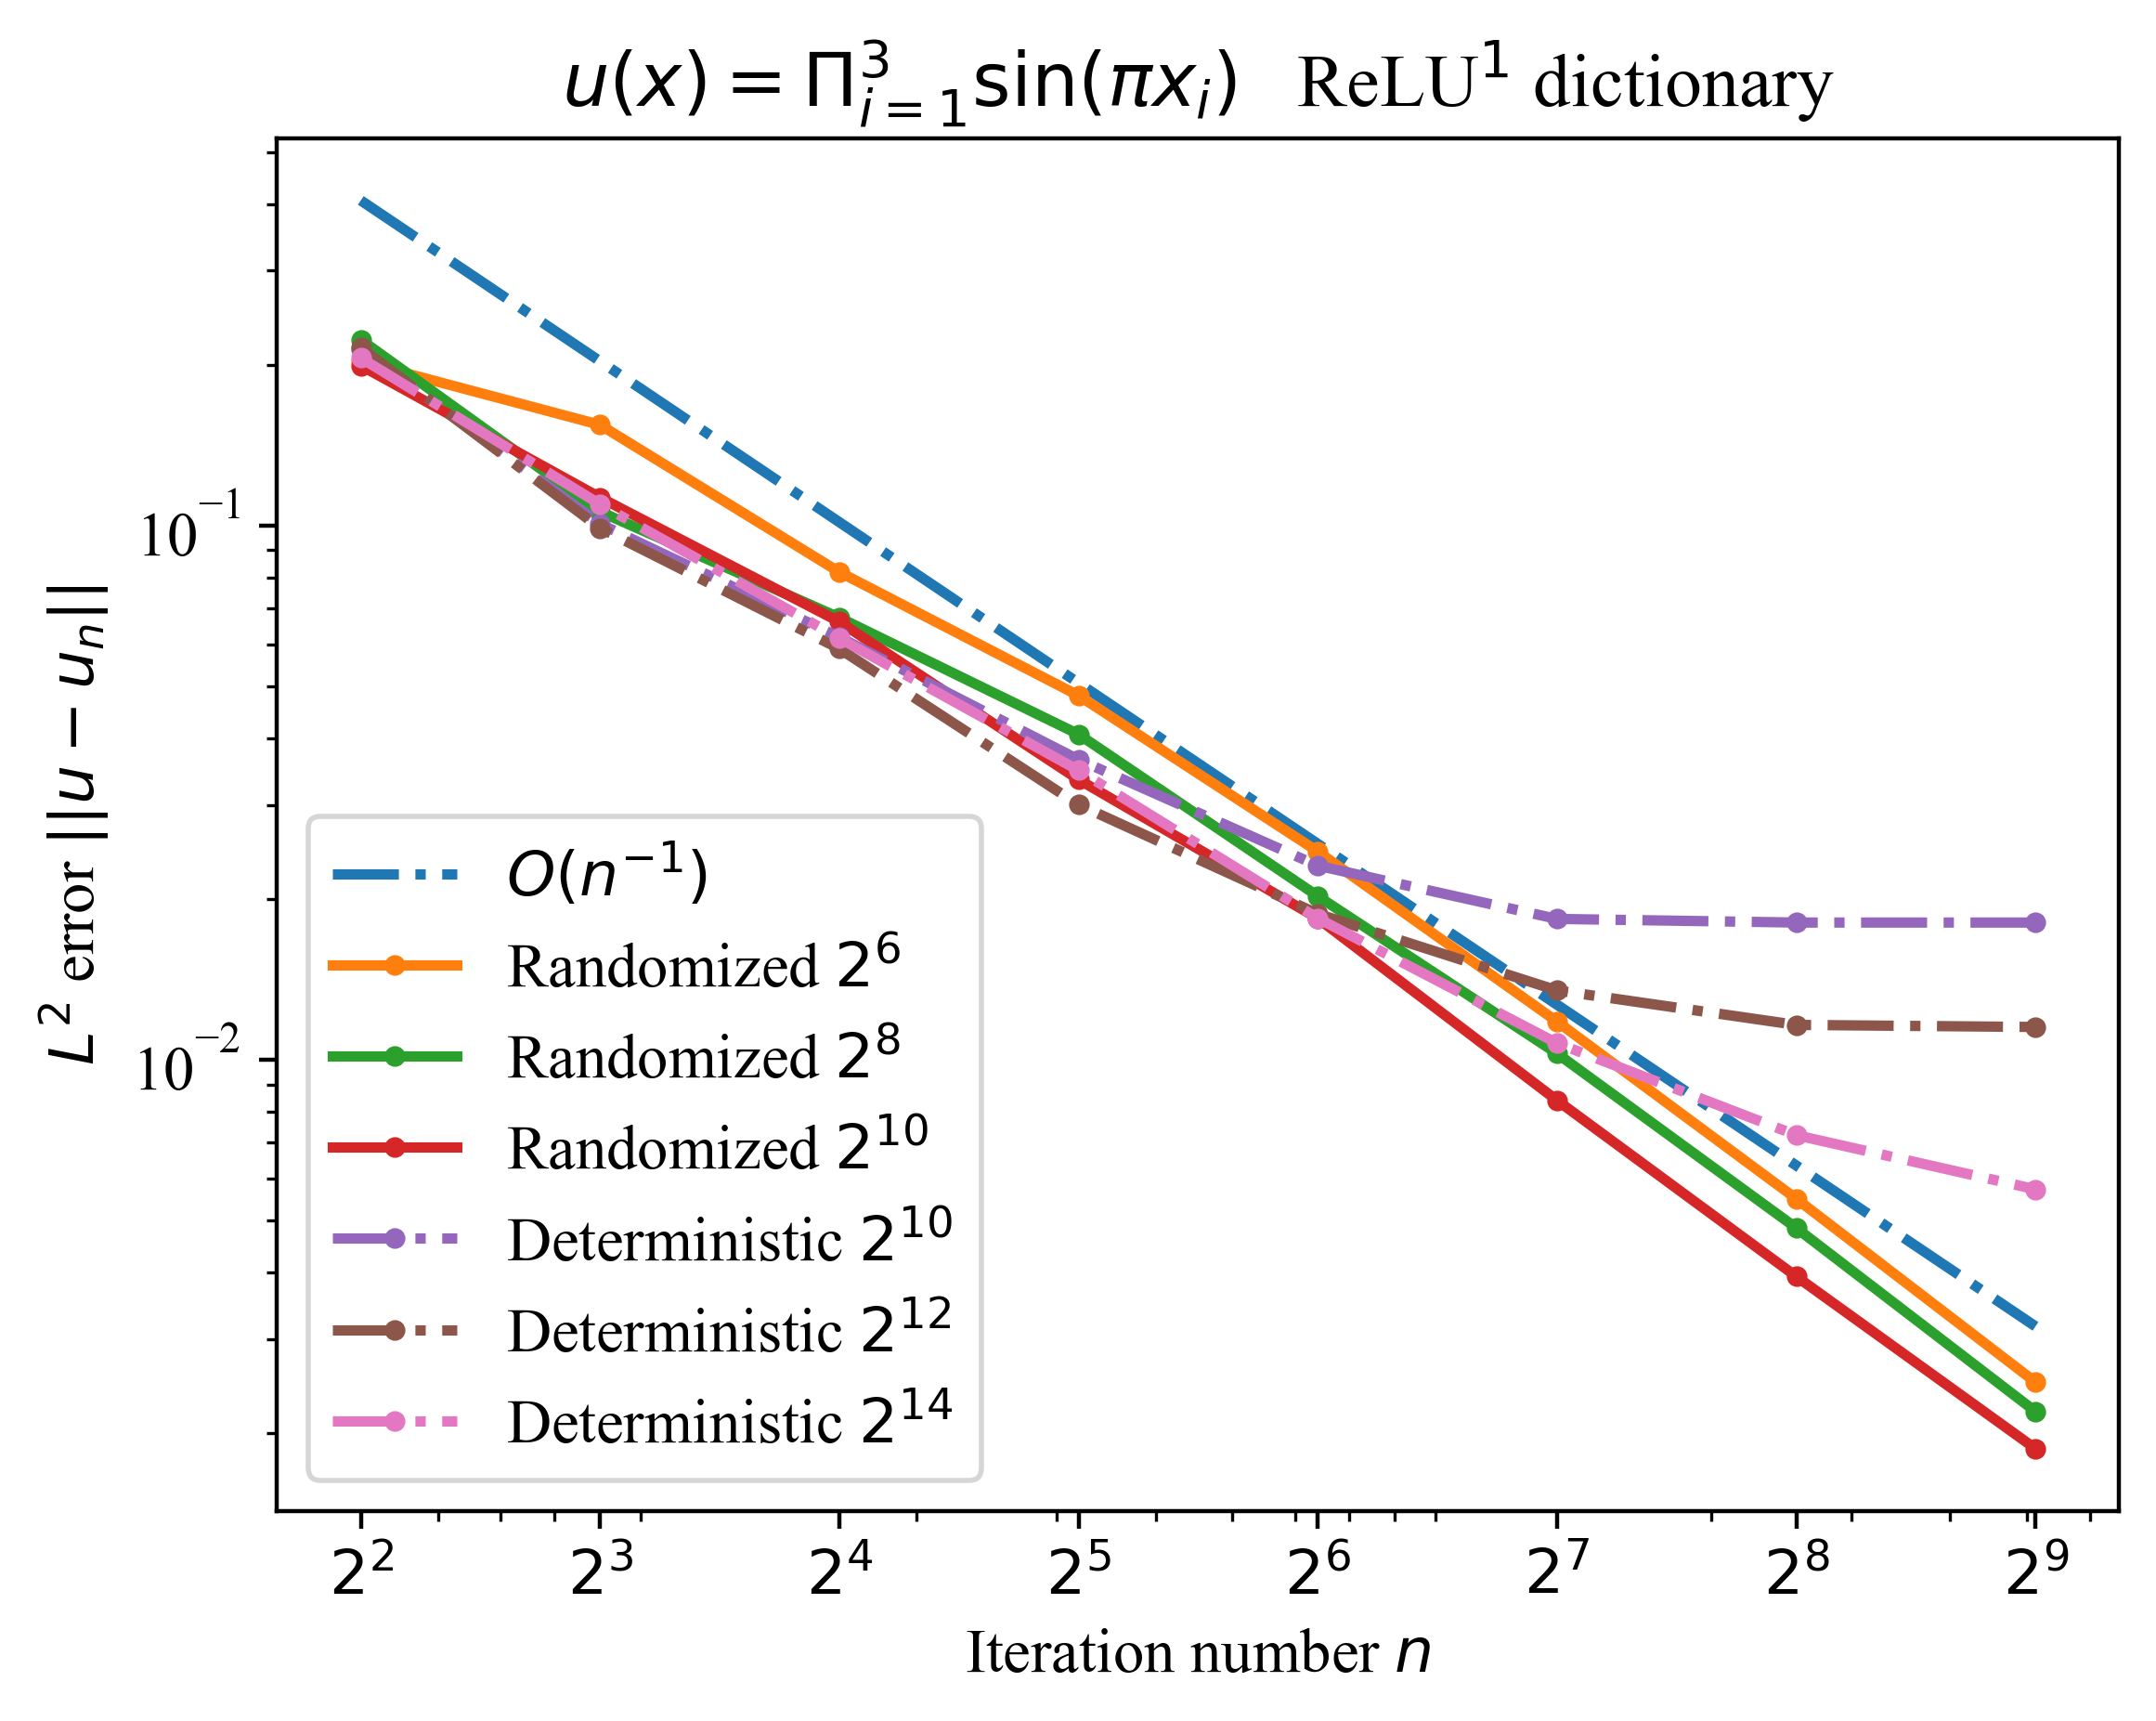

In [3]:
def plot_err_vs_neurons(k,d,err_list_relu_4_rand,err_list_relu_4_deterministic,filename, fig_title, exponent = 9, save = False, rescale_ref = 1.5):
    """ Neuron numbers 2^2, 2^3, 2^4, ..., 2^9. 
    """
    rate = -1/2 - (2 * k + 1)/(2 * d)

    f_size = 12  # Increased font size
    line_width = 2  # Thickness of the lines
    # Set global font size
    plt.rcParams.update({'font.size': f_size})
    
    neuron_nums = np.array([2**j for j in range(2,exponent+1)])  
    rand_size_exp_list = [6,7,8,9,10] 
#     rand_size_exp_list = [10,12,14,16]
    # dictionary_size_list= [[2**3,2**3,2**2,2**2], [2**3,2**3,2**3,2**3],[2**4,2**4,2**3,2**3],[2**4,2**4,2**4,2**4]]
    dictionary_size_exp_list = [10,12,14,16]

    plt.figure(dpi = 400)
    x = np.array(range(4, 2**exponent+1))
    ref = err_list_relu_4_rand[0][2**2]* (x/ 4)**(rate)*rescale_ref

    plt.plot(x,ref,'-.',linewidth=line_width,label = '$O(n^{{{}}})$'.format(int(rate)))

    for i, err in enumerate(err_list_relu_4_rand): 
        if rand_size_exp_list[i] == 7 or rand_size_exp_list[i] == 9:
            continue
        plt.plot(neuron_nums, err[neuron_nums],'.-',linewidth=line_width,
                 label = "Randomized $2^{{{}}}$".format(rand_size_exp_list[i]))

    for i, err in enumerate(err_list_relu_4_deterministic): 
        plt.plot(neuron_nums, err[neuron_nums],'.-.', linewidth=line_width,
                label = "Deterministic $2^{{{}}}$ ".format(dictionary_size_exp_list[i])) 

    plt.title( fig_title+"   ReLU$^{}$ dictionary".format(k))
    plt.yscale('log')
    plt.xscale('log')
    # plt.grid("True")
    plt.xlabel("Iteration number $n$")
    plt.ylabel("$L^2$ error $||u-u_n||$")
    plt.xticks(neuron_nums,[rf"$2^{{{ns}}}$" for ns in range(2,exponent+1)])
    plt.legend(loc='lower left')    

    if save:
        plt.savefig(filename) 
    else:
        plt.show()
    return 0 
## plot results 
## read data: 
## plot results 
## read data: 
filename = "3D_sinpix1x2x3_rand_deter_relu1_Dict_compare.png"
k = 1
d = 3  
fig_title = "$u(x) = \Pi_{{i=1}}^3 \sin(\pi x_i)$"
save = True 
plot_err_vs_neurons(k,d,err_list_relu_4_rand,err_list_relu_4_deterministic,filename, fig_title, exponent = 9, save = save, rescale_ref=2.)